# 研究目标

创建一个分类器来识别蔬菜和水果。

In [1]:
import os

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

加载图像。

`imread`函数读取图像后，将图像数据存储在`ndarray`，`ndarray`如何存储图像数据？

* `ndarray`用三维数组存储图像数据，第一个维度是图像高度，第二个维度是图像宽度，第三个维度表示像素的颜色。
* 数组中的每个元素，分别对应图像中的每个像素。
* RGB图像的数组形状是(height,width,3)，每个元素是一个长度为3的数组，分别表示红，绿，蓝三种颜色的值。
* BGR图像的数组形状是(height,width,3)，每个元素是一个长度为3的数组，分别表示蓝，绿，红三种颜色的值。
* `image_array[i, j]`返回代表一个像素的一维数组。

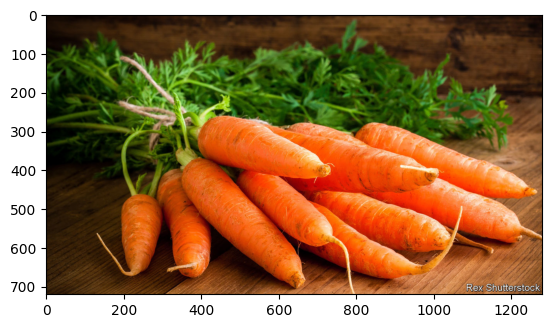

In [2]:
image_file = "data/train/carrot/Image_1.jpg"

# Load image
image = cv2.imread(image_file)
# print(type(image))

# Convert the image from BGR to RGB 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the image to grayscale
# image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Plot the image
_ = plt.imshow(image)
# _ = plt.imshow(image, cmap='gray')

调整图像大小。

Original size: 1280 x 720 pixels
New size: 256 x 256 pixels


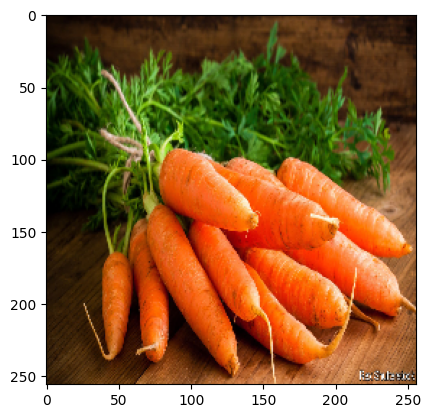

In [3]:
image_file = "data/train/carrot/Image_1.jpg"

# Load image
image = cv2.imread(image_file)
print(f"Original size: {image.shape[1]} x {image.shape[0]} pixels")

# Resize image
new_width = 256
new_height = 256
resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_LINEAR)
print(f"New size: {resized_image.shape[1]} x {resized_image.shape[0]} pixels")

# Convert image from BGR to RGB
resized_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

# Plot the image
_ = plt.imshow(resized_image)

如何理解像素(pixel)？

* 像素是图像的基本组成单元，每个像素其实都是一个小方块，它包含了颜色和亮度等信息，当成千上万的像素集合到一起，就形成一副完整的图像。
* 像素包含以下信息：颜色，位置和亮度。
* 颜色通常用红，绿，蓝（RGB）三种颜色的值来表示。
* 位置，每个像素都有独特的位置，用行坐标和纵坐标来表示。
* 亮度，每个像素都有一个亮度值，用来表示像素的明暗程度。

灰度图像和彩色图像有什么区别？

从本地读取图像数据，准备特征矩阵X和目标变量y。

1. 使用彩色图像还是灰度图像？

颜色对区分类别很重要，例如白萝卜和胡萝卜的颜色是不同的，苹果，雪梨和桃子的外形很相似但颜色完全不同。因此，使用彩色图像。

2. 调整图像大小

保留足够的细节以完成分类任务，一般选择为256*256。

In [16]:
def load_images(
    directory: str, new_width: int = 256, new_height: int = 256
) -> tuple[list[np.ndarray], list[str]]:
    """Load images from a directory

    Args:
        directory: a directory containing subdirectories of images, one subdirectory per class
        new_width: the width to resize the images to
        new_height: the height to resize the images to

    Returns:
        A tuple of (images, labels)
    """
    class_names = os.listdir(directory)
    image_list = []
    label_list = []

    for name in class_names:
        subdirectory = os.path.join(directory, name)
        if os.path.isdir(subdirectory):
            for image_file in os.listdir(subdirectory):
                try:
                    image_path = os.path.join(subdirectory, image_file)
                    image = cv2.imread(image_path)
                    resized_image = cv2.resize(
                        image, (new_width, new_height), interpolation=cv2.INTER_LINEAR
                    )
                    rgb_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
                except Exception as e:
                    print(f"{image_path}: failed to load image, {e}")
                else:
                    image_list.append(rgb_image)
                    label_list.append(name)

    return image_list, label_list

In [17]:
directory = "./data/train"
images, labels = load_images(directory)
print(f"Loaded {len(images)} images with labels {set(labels)}")

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


./data/train/bell pepper/Image_56.jpg: failed to load image, OpenCV(4.8.1) /Users/xperience/GHA-OpenCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Loaded 3114 images with labels {'kiwi', 'lemon', 'tomato', 'sweetpotato', 'capsicum', 'peas', 'cabbage', 'turnip', 'watermelon', 'apple', 'pear', 'potato', 'bell pepper', 'banana', 'soy beans', 'lettuce', 'chilli pepper', 'sweetcorn', 'cucumber', 'onion', 'grapes', 'paprika', 'orange', 'eggplant', 'raddish', 'pomegranate', 'spinach', 'cauliflower', 'pineapple', 'beetroot', 'ginger', 'garlic', 'carrot', 'mango', 'corn', 'jalepeno'}


In [19]:
X = np.stack([image.flatten() for image in images], axis=0)

In [21]:
X.shape

(3114, 196608)